In [1]:
import pickle
from negbin_weather import *
from src.inference import *
from src.criticism import *
from src.preprocess_bikeshare import *

In [7]:
with open('../data/final_train.pickle', 'rb') as f:
    data_samp = pickle.load(f)

data, features = feature_generation(data_samp)
p = NegBinReg(features, data)

/Users/nihaar/Documents/virtual-envs/MLwPP/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0 188229


/Users/nihaar/Documents/virtual-envs/MLwPP/lib/python3.6/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


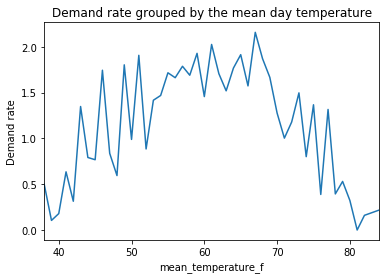

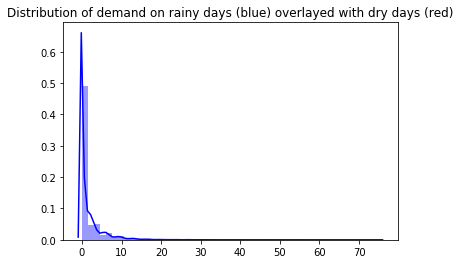

In [8]:
plt.figure()
plt.title('Demand rate grouped by the mean day temperature')
plt.ylabel('Demand rate') 
data_samp.groupby('mean_temperature_f')['demand'].mean().plot()



mask_rain = data_samp['precipitation_inches']!='0'
rainy_days = data_samp.loc[mask_rain]
rainy_demand = np.array(rainy_days['demand'])

mask_dry = data_samp['precipitation_inches']=='dry'
dry_days = data_samp.loc[mask_dry]
dry_demand = np.array(dry_days['demand'])

print(len(dry_demand),len(rainy_demand))

plt.figure()
plt.title('Distribution of demand on rainy days (blue) overlayed with dry days (red)')
sns.distplot(rainy_demand,color='blue')
sns.distplot(dry_demand,color='red')

In [4]:
svi, elbo_loss = run_svi(p.model, p.guide,
                         iters=5000,
                         data=data['data'],
                         demand=data['demand'],
                         filename='models/negbin_weather_params.pkl')

/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin_weather.py:154: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  total_count_loc = pyro.param('total_count_loc', torch.tensor(5.),
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columbia/code/probprog-finalproject/negbin_weather.py:207: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  torch.tensor(0.5)))
/Users/nihaar/Documents/Fall19/ML_Probabilistic_Programming_Columb

In [5]:
svi_posterior = get_svi_posterior(data['data'], data['demand'],
                                  svi=svi)

In [6]:
print(svi.information_criterion())

OrderedDict([('waic', tensor(6810.2461, grad_fn=<SumBackward0>)), ('p_waic', tensor(206.4073, grad_fn=<SumBackward0>))])


In [8]:
    post_samples_prec = ppd_samples(
        p.wrapped_model,
        svi_posterior,
        data,
        ['obs'],
        num_samples=1000)

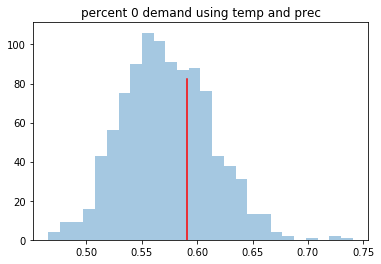

In [14]:

compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=perc_0,title='percent 0 demand using temp and prec')


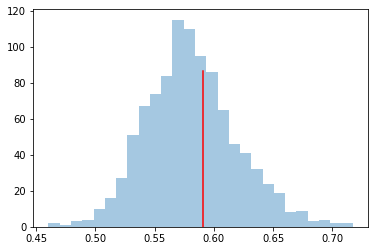

In [7]:
    compare_test_statistic(data_samp.demand.values, post_samples[:,0,:],
                           stat=perc_0)

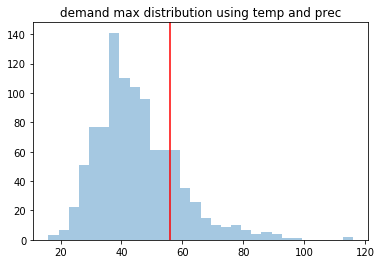

In [16]:

compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=max_,title='demand max distribution using temp and prec')

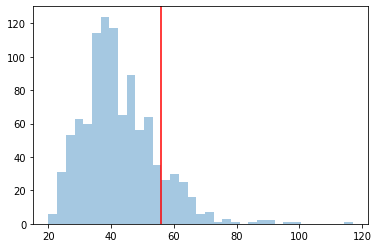

In [8]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=max_)

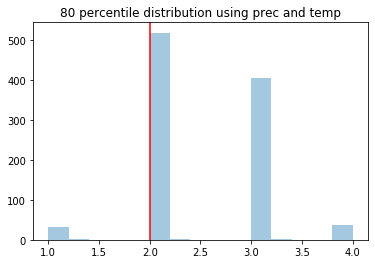

In [18]:
compare_test_statistic(data_samp.demand.values, post_samples_prec[:,0,:],
                       stat=percentile,q=80,title='80 percentile distribution using prec and temp')

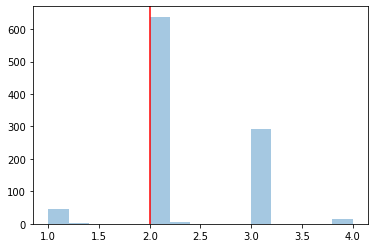

In [9]:
    compare_test_statistic(data_samp.demand.values, post_samples[:, 0, :],
                           stat=percentile, q=80)